# Librerías

In [1]:
#Importar los paquetes necesarios
import os
import pickle as pk
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Dataset

In [2]:
#Clonar dataset del repositorio en Github
!git clone https://github.com/danielchapi/dataset_PYT.git

Cloning into 'dataset_PYT'...
remote: Enumerating objects: 2547, done.
remote: Counting objects: 100% (2547/2547), done.
remote: Compressing objects: 100% (2546/2546), done.
remote: Total 2547 (delta 2), reused 2541 (delta 0), pack-reused 0
Receiving objects: 100% (2547/2547), 40.45 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
#Ruta del dataset
TrainImagePath = "/content/dataset_PYT/dataset/Garbage classification/Garbage classification"

In [4]:
#Creación de generadores de datos de entrenamiento
trainDataGenerator = ImageDataGenerator(
        zoom_range=0.1,
        shear_range=0.1,
        validation_split=0.2,
        horizontal_flip=True)

trainDataSet = trainDataGenerator.flow_from_directory(
        TrainImagePath,
        target_size=(384, 512),
        batch_size=32,
        class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [5]:
#Creación de generadores de datos de prueba
testDataGenerator = ImageDataGenerator()

testDataSet = testDataGenerator.flow_from_directory(
        TrainImagePath,
        target_size=(384, 512),
        batch_size=32,
        class_mode='categorical')
 
#Etiquetas de cada clase
print(testDataSet.class_indices)

Found 2527 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [6]:
#Generación de imágenes para cada clase
TrainImageClasses = testDataSet.class_indices
table = {}
for imageVal, imageName in zip(TrainImageClasses.values(), TrainImageClasses.keys()):
    table[imageVal] = imageName

#Almacenamiento de la tabla
with open("tableValues.pkl", "wb") as fileWriter:
    pk.dump(table, fileWriter)

# Modelo

In [ ]:
#Creación del modelo
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='swish', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (5, 5), activation='swish'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (5, 5), activation='swish'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (5, 5), activation='swish'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='swish'), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

#Definición del optimizador
optimizer = keras.optimizers.Adam(learning_rate=0.001)

#Ajustes del modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 382, 510, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 378, 506, 32)      25632     
                                                                 
 batch_normalization_1 (Batc  (None, 378, 506, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 189, 253, 32)     0         
 )                                                               
                                                        

In [ ]:
#Configuración de callbacks para almacenamiento del modelo entrenado por cada epoch
from keras.callbacks import ModelCheckpoint
filepath = '/content/model_class_21.epoch{epoch:02d}.hdf5'
callback = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')
callbacks = [callback]

# Entrenamiento

In [ ]:
history = model.fit(trainDataSet, batch_size=32, epochs=22, validation_data=testDataSet, callbacks=callbacks)

Epoch 1/22
79/79 [==============================] - ETA: 0s - loss: 0.6210 - accuracy: 0.7685
Epoch 1: accuracy improved from -inf to 0.76850, saving model to /content/model_class_21.epoch01.hdf5
79/79 [==============================] - 144s 2s/step - loss: 0.6210 - accuracy: 0.7685 - val_loss: 1.6569 - val_accuracy: 0.5457
Epoch 2/22
79/79 [==============================] - ETA: 0s - loss: 0.6221 - accuracy: 0.7784
Epoch 2: accuracy improved from 0.76850 to 0.77839, saving model to /content/model_class_21.epoch02.hdf5
79/79 [==============================] - 143s 2s/step - loss: 0.6221 - accuracy: 0.7784 - val_loss: 0.6298 - val_accuracy: 0.7649
Epoch 3/22
79/79 [==============================] - ETA: 0s - loss: 0.5292 - accuracy: 0.8195
Epoch 3: accuracy improved from 0.77839 to 0.81955, saving model to /content/model_class_21.epoch03.hdf5
79/79 [==============================] - 144s 2s/step - loss: 0.5292 - accuracy: 0.8195 - val_loss: 2.2294 - val_accuracy: 0.4436
Epoch 4/22
79/79

# Métricas

In [ ]:
#Evaluamos el loss y accuracy del modelo con la data de prueba
score = model.evaluate(testDataSet)
print("Loss: ", score[0])
print("Accuracy: {:.2f}%".format(score[1] * 100))

79/79 [==============================] - 21s 260ms/step - loss: 0.4576 - accuracy: 0.8417
Loss:  0.457582026720047
Accuracy: 84.17%


In [ ]:
#Evaluamos el loss y accuracy del modelo con un batchsize de la data de prueba
batch_size = 32
test_score = model.evaluate_generator(testDataSet, batch_size)
print("Accuracy: {:.2f}%".format(test_score[1] * 100))
print("Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 83.50%
Loss:  0.47081056237220764


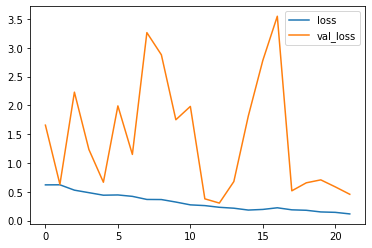

In [ ]:
#Graficamos la variación del loss obtenido en el entrenamiento del modelo
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

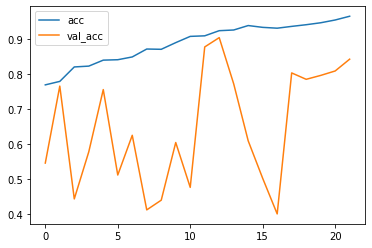

In [ ]:
#Graficamos la variación del accuracy obtenida en el entrenamiento del modelo
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Almacenamiento del modelo

In [7]:
#Nos conectamos a Google Drive para almacenar ahí el modelo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Guardar el modelo
model.save("/content/drive/MyDrive/PROYECTOS 7-PROTOTIPO/model_garbage_clasification.hdf5")

# Carga del modelo

In [8]:
#Cargar el modelo entrenado
from keras.models import load_model
garbage_model = load_model('/content/drive/MyDrive/PROYECTOS 7-PROTOTIPO/model_class_21.epoch22.hdf5')

# Predicción

In [42]:
def spanish_output(resultado):
  if resultado == 'cardboard':
    detect = 'Cartón'
    trash = 'Tacho azul (Papel y cartón)'
  elif resultado == 'glass':
    detect = 'Vidrio'
    trash = 'Tacho blanco (Plástico y vidrio)'
  elif resultado == 'metal':
    detect = 'Metal'
    trash = 'Tacho amarrillo (Amarillo)'
  elif resultado == 'paper':
    detect = 'Papel'
    trash = 'Tacho azul (Papel y cartón)'
  elif resultado == 'plastic':
    detect = 'Plástico'
    trash = 'Tacho blanco (Plástico y vidrio)'
  elif resultado == 'trash':
    detect = 'Otros'
    trash = 'Tacho negro (Residuos comunes)'

  return detect, trash

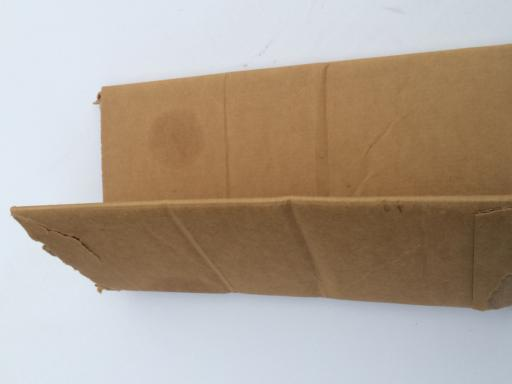

--------------------------------------------------------------------
Tipo de residuo:  Cartón
Arrojar en  Tacho azul (Papel y cartón)
--------------------------------------------------------------------


In [46]:
#Prueba del modelo con una predicción

#Cargamos una imagen y ajustamos sus dimensiones a las de la entrada del modelo
ImagePath = '/content/dataset_PYT/dataset/Garbage classification/Garbage classification/cardboard/cardboard208.jpg'
img_show = cv2.imread(ImagePath)
test_image = image.load_img(ImagePath,target_size=(384, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

#Hacemos la predicción
result = garbage_model.predict(test_image,verbose=0)
detect,trash = spanish_output(table[np.argmax(result)])

cv2_imshow(img_show)
print('----'*17)
print('Tipo de residuo: ', detect)
print('Arrojar en ', trash)
print('----'*17)

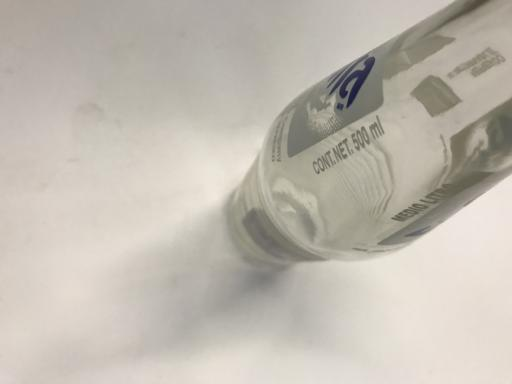

--------------------------------------------------------------------
Tipo de residuo:  Vidrio
--------------------------------------------------------------------


In [35]:
#Prueba del modelo con una predicción

#Cargamos una imagen y ajustamos sus dimensiones a las de la entrada del modelo
ImagePath = '/content/dataset_PYT/dataset/Garbage classification/Garbage classification/glass/glass189.jpg'
img_show = cv2.imread(ImagePath)
test_image = image.load_img(ImagePath,target_size=(384, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

#Hacemos la predicción
result = garbage_model.predict(test_image,verbose=0)
detect,trash = spanish_output(table[np.argmax(result)])

cv2_imshow(img_show)
print('----'*17)
print('Tipo de residuo: ', detect)
print('Arrojar en ', trash)
print('----'*17)

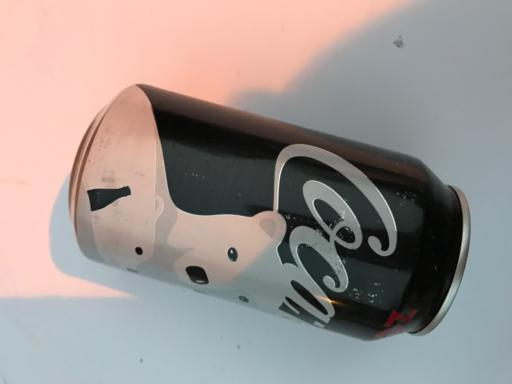

--------------------------------------------------------------------
Tipo de residuo:  Metal
--------------------------------------------------------------------


In [37]:
#Prueba del modelo con una predicción

#Cargamos una imagen y ajustamos sus dimensiones a las de la entrada del modelo
ImagePath = '/content/dataset_PYT/dataset/Garbage classification/Garbage classification/metal/metal185.jpg'
img_show = cv2.imread(ImagePath)
test_image = image.load_img(ImagePath,target_size=(384, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

#Hacemos la predicción
result = garbage_model.predict(test_image,verbose=0)
detect,trash = spanish_output(table[np.argmax(result)])

cv2_imshow(img_show)
print('----'*17)
print('Tipo de residuo: ', detect)
print('Arrojar en ', trash)
print('----'*17)

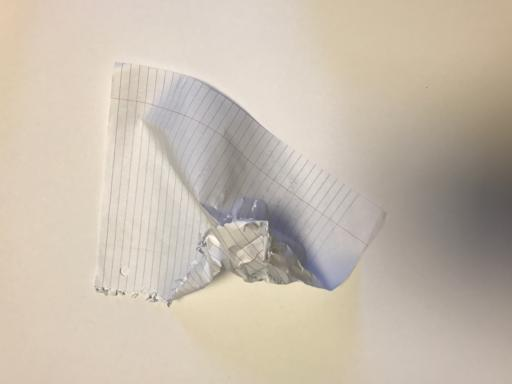

--------------------------------------------------------------------
Tipo de residuo:  Papel
--------------------------------------------------------------------


In [39]:
#Prueba del modelo con una predicción

#Cargamos una imagen y ajustamos sus dimensiones a las de la entrada del modelo
ImagePath = '/content/dataset_PYT/dataset/Garbage classification/Garbage classification/paper/paper170.jpg'
img_show = cv2.imread(ImagePath)
test_image = image.load_img(ImagePath,target_size=(384, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

#Hacemos la predicción
result = garbage_model.predict(test_image,verbose=0)
detect,trash = spanish_output(table[np.argmax(result)])

cv2_imshow(img_show)
print('----'*17)
print('Tipo de residuo: ', detect)
print('----'*17)

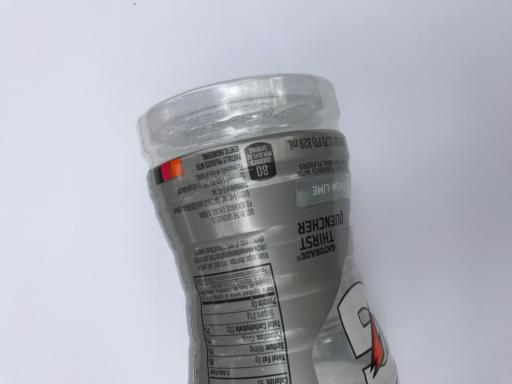

--------------------------------------------------------------------
Tipo de residuo:  Plástico
--------------------------------------------------------------------


In [40]:
#Prueba del modelo con una predicción

#Cargamos una imagen y ajustamos sus dimensiones a las de la entrada del modelo
ImagePath = '/content/dataset_PYT/dataset/Garbage classification/Garbage classification/plastic/plastic93.jpg'
img_show = cv2.imread(ImagePath)
test_image = image.load_img(ImagePath,target_size=(384, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

#Hacemos la predicción
result = garbage_model.predict(test_image,verbose=0)
detect,trash = spanish_output(table[np.argmax(result)])

cv2_imshow(img_show)
print('----'*17)
print('Tipo de residuo: ', detect)
print('----'*17)

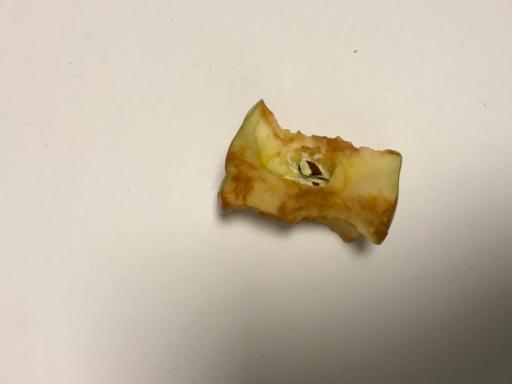

--------------------------------------------------------------------
Tipo de residuo:  Otros
--------------------------------------------------------------------


In [41]:
#Prueba del modelo con una predicción

#Cargamos una imagen y ajustamos sus dimensiones a las de la entrada del modelo
ImagePath = '/content/dataset_PYT/dataset/Garbage classification/Garbage classification/trash/trash101.jpg'
img_show = cv2.imread(ImagePath)
test_image = image.load_img(ImagePath,target_size=(384, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

#Hacemos la predicción
result = garbage_model.predict(test_image,verbose=0)
detect,trash = spanish_output(table[np.argmax(result)])

cv2_imshow(img_show)
print('----'*17)
print('Tipo de residuo: ', detect)
print('----'*17)